<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,29.201947,38.347944,20.435524,31.850063,-6.592796,123.242681,115.776072,7.466610
1,0.0,1.0,40.126854,48.656878,25.981421,50.755909,-13.818643,161.702418,162.006537,-0.304119
2,0.0,2.0,32.109093,29.152322,86.810202,79.033933,0.259685,237.365234,254.889931,-17.524697
3,0.0,3.0,83.765008,84.348776,41.128562,88.505291,-28.303383,279.444255,293.087816,-13.643561
4,0.0,4.0,76.467716,92.274741,38.599011,46.448238,-12.317961,251.471744,248.893976,2.577768
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.165100,80.840217,38.515903,79.470867,10.038075,298.030162,276.095172,21.934990
19996,999.0,16.0,27.586575,46.577667,75.428569,33.576878,39.578889,232.748578,203.007122,29.741456
19997,999.0,17.0,95.685470,61.509943,72.404546,93.967727,-33.370123,300.197563,301.957915,-1.760352
19998,999.0,18.0,36.885521,35.896400,84.607659,90.087049,5.705099,263.181730,269.741268,-6.559538


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    29.201947  38.347944  20.435524  31.850063  -6.592796   
      1.0    40.126854  48.656878  25.981421  50.755909 -13.818643   
      2.0    32.109093  29.152322  86.810202  79.033933   0.259685   
      3.0    83.765008  84.348776  41.128562  88.505291 -28.303383   
      4.0    76.467716  92.274741  38.599011  46.448238 -12.317961   
...                ...        ...        ...        ...        ...   
999.0 15.0   79.165100  80.840217  38.515903  79.470867  10.038075   
      16.0   27.586575  46.577667  75.428569  33.576878  39.578889   
      17.0   95.685470  61.509943  72.404546  93.967727 -33.370123   
      18.0   36.885521  35.896400  84.607659  90.087049   5.705099   
      19.0   74.865014  82.653062  75.595391  89.719271   4.380961   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    123.242681  115.776072   7.466610  
      1.0    161.702418  162.006537  -0.304119  
      2.0    237.365234  254.889931 -17.524697  
      3.0    279.444255  293.087816 -13.643561  
      4.0    251.471744  248.893976   2.577768  
...                 ...         ...        ...  
999.0 15.0   298.030162  276.095172  21.934990  
      16.0   232.748578  203.007122  29.741456  
      17.0   300.197563  301.957915  -1.760352  
      18.0   263.181730  269.741268  -6.559538  
      19.0   337.213699  333.623789   3.589910  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    29.201947  38.347944  20.435524  31.850063  -6.592796   
      1.0    40.126854  48.656878  25.981421  50.755909 -13.818643   
      2.0    32.109093  29.152322  86.810202  79.033933   0.259685   
      3.0    83.765008  84.348776  41.128562  88.505291 -28.303383   
      4.0    76.467716  92.274741  38.599011  46.448238 -12.317961   
...                ...        ...        ...        ...        ...   
999.0 15.0   79.165100  80.840217  38.515903  79.470867  10.038075   
      16.0   27.586575  46.577667  75.428569  33.576878  39.578889   
      17.0   95.685470  61.509943  72.404546  93.967727 -33.370123   
      18.0   36.885521  35.896400  84.607659  90.087049   5.705099   
      19.0   74.865014  82.653062  75.595391  89.719271   4.380961   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    123.242681  115.776072   7.466610  
      1.0    161.702418  162.006537  -0.304119  
      2.0    237.365234  254.889931 -17.524697  
      3.0    279.444255  293.087816 -13.643561  
      4.0    251.471744  248.893976   2.577768  
...                 ...         ...        ...  
999.0 15.0   298.030162  276.095172  21.934990  
      16.0   232.748578  203.007122  29.741456  
      17.0   300.197563  301.957915  -1.760352  
      18.0   263.181730  269.741268  -6.559538  
      19.0   337.213699  333.623789   3.589910  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,29.201947,38.347944,20.435524,31.850063,-6.592796,123.242681,115.776072,7.466610
1,0.0,1.0,40.126854,48.656878,25.981421,50.755909,-13.818643,161.702418,162.006537,-0.304119
2,0.0,2.0,32.109093,29.152322,86.810202,79.033933,0.259685,237.365234,254.889931,-17.524697
3,0.0,3.0,83.765008,84.348776,41.128562,88.505291,-28.303383,279.444255,293.087816,-13.643561
4,0.0,4.0,76.467716,92.274741,38.599011,46.448238,-12.317961,251.471744,248.893976,2.577768
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,79.165100,80.840217,38.515903,79.470867,10.038075,298.030162,276.095172,21.934990
19996,999.0,16.0,27.586575,46.577667,75.428569,33.576878,39.578889,232.748578,203.007122,29.741456
19997,999.0,17.0,95.685470,61.509943,72.404546,93.967727,-33.370123,300.197563,301.957915,-1.760352
19998,999.0,18.0,36.885521,35.896400,84.607659,90.087049,5.705099,263.181730,269.741268,-6.559538


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    29.201947  38.347944  20.435524  31.850063  -6.592796   
      1.0    40.126854  48.656878  25.981421  50.755909 -13.818643   
      2.0    32.109093  29.152322  86.810202  79.033933   0.259685   
      3.0    83.765008  84.348776  41.128562  88.505291 -28.303383   
      4.0    76.467716  92.274741  38.599011  46.448238 -12.317961   
...                ...        ...        ...        ...        ...   
999.0 15.0   79.165100  80.840217  38.515903  79.470867  10.038075   
      16.0   27.586575  46.577667  75.428569  33.576878  39.578889   
      17.0   95.685470  61.509943  72.404546  93.967727 -33.370123   
      18.0   36.885521  35.896400  84.607659  90.087049   5.705099   
      19.0   74.865014  82.653062  75.595391  89.719271   4.380961   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    123.242681  115.776072   7.466610  
      1.0    161.702418  162.006537  -0.304119  
      2.0    237.365234  254.889931 -17.524697  
      3.0    279.444255  293.087816 -13.643561  
      4.0    251.471744  248.893976   2.577768  
...                 ...         ...        ...  
999.0 15.0   298.030162  276.095172  21.934990  
      16.0   232.748578  203.007122  29.741456  
      17.0   300.197563  301.957915  -1.760352  
      18.0   263.181730  269.741268  -6.559538  
      19.0   337.213699  333.623789   3.589910  

[20000 rows x 8 columns]

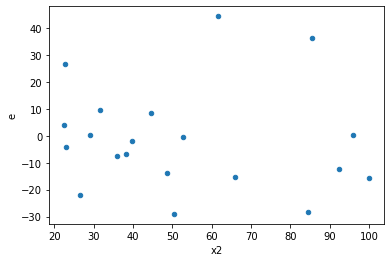

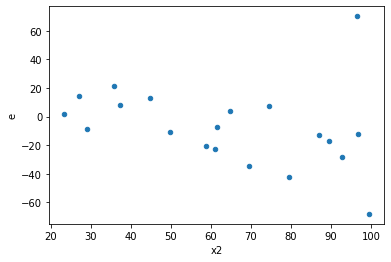

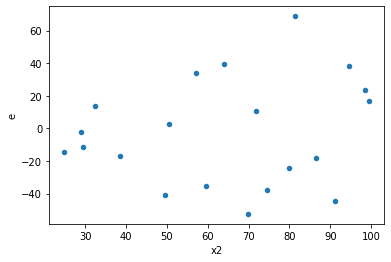

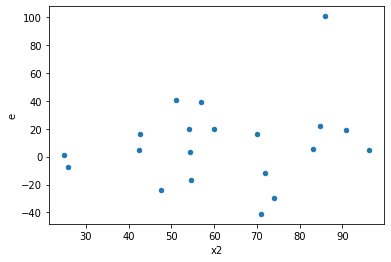

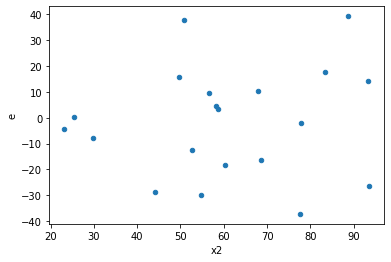

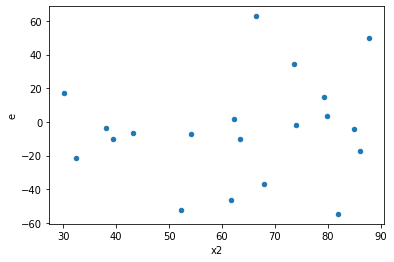

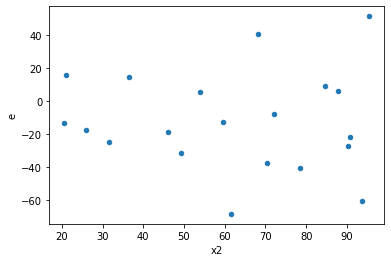

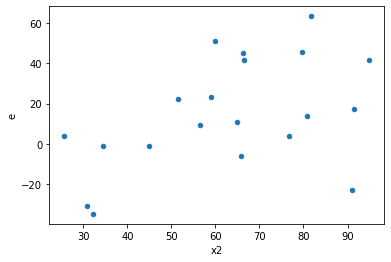

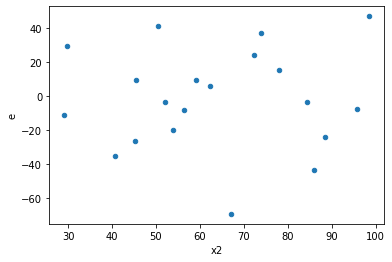

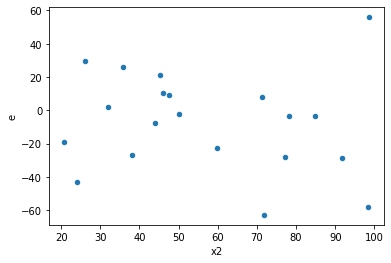

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,5.0,7.0,715.0727878050159,5992.0407337528295,143.0145575610032,856.005819107547,5.9854453539977275,0.03625780773126497,0.9818710961343675,0.018128903865632484,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,3581.8959892376784,4512.877824668803,596.9826648729464,752.1463041114672,1.2599131404787838,0.7862498655325076,0.6068750672337462,0.3931249327662538,Reject001=1 : Homoscedasticity
7.0,1.0,11.0,4.782137916322191e-25,4560.889019506592,4.782137916322191e-25,414.6262745005993,8.67031193486525e+26,0.0,1.0,0.0,Reject001=0 : Heteroscedasticity
8.0,6.0,6.0,3379.422157702528,6702.601590996054,563.2370262837546,1117.100265166009,1.983357295482954,0.4252780560613241,0.787360971969338,0.21263902803066204,Reject001=1 : Homoscedasticity
9.0,7.0,5.0,4390.653869956666,3364.6615321405916,627.2362671366666,672.9323064281183,1.0728529928603365,0.9725864823844281,0.5137067588077859,0.48629324119221407,Reject001=1 : Homoscedasticity
10.0,8.0,4.0,650.2282613150873,1321.6508258059014,81.2785326643859,330.41270645147534,4.065190347564596,0.1915504030019961,0.904224798499002,0.09577520150099805,Reject001=1 : Homoscedasticity
12.0,6.0,6.0,3147.4243043523556,3168.939978558431,524.5707173920592,528.1566630930719,1.006835962401486,0.9936131649048705,0.5031934175475647,0.49680658245243525,Reject001=1 : Homoscedasticity
15.0,9.0,3.0,6136.104805106524,3786.3826740178924,681.7894227896137,1262.1275580059641,1.8511985017922916,0.666727949744431,0.6666360251277845,0.3333639748722155,Reject001=1 : Homoscedasticity
17.0,2.0,10.0,258.96839303407154,8449.568750785586,129.48419651703577,844.9568750785586,6.5255598583213255,0.03073051683418604,0.984634741582907,0.01536525841709302,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,3.0,9.0,943.4300230453055,1215.1230426013478,314.47667434843515,135.01367140014975,0.4293280946190519,0.5260199737543215,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,9359.795292442252,1131.3454236642397,1559.9658820737086,188.55757061070662,0.12087288111715078,0.021199098524589555,Reject001=1 : Homoscedasticity
2.0,11.0,1.0,10493.925028413367,3.1988625251074117e-25,953.9931844012152,3.1988625251074117e-25,3.353129327768955e-28,1.9500838726532928e-146,Reject001=0 : Heteroscedasticity
3.0,5.0,7.0,715.0727878050159,5992.0407337528295,143.0145575610032,856.005819107547,5.9854453539977275,0.03625780773126497,Reject001=1 : Homoscedasticity
4.0,10.0,2.0,3599.236154702411,639.0216909203882,359.9236154702411,319.5108454601941,0.8877184817193848,0.7241420466401253,Reject001=1 : Homoscedasticity
5.0,11.0,1.0,9909.073187442495,7.674038885990003e-26,900.824835222045,7.674038885990003e-26,8.518902439116728e-29,1.0403672274566315e-149,Reject001=0 : Heteroscedasticity
6.0,6.0,6.0,3581.8959892376784,4512.877824668803,596.9826648729464,752.1463041114672,1.2599131404787838,0.7862498655325076,Reject001=1 : Homoscedasticity
7.0,1.0,11.0,4.782137916322191e-25,4560.889019506592,4.782137916322191e-25,414.6262745005993,8.67031193486525e+26,0.0,Reject001=0 : Heteroscedasticity
8.0,6.0,6.0,3379.422157702528,6702.601590996054,563.2370262837546,1117.100265166009,1.983357295482954,0.4252780560613241,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      776
Reject001=0 : Heteroscedasticity    224
Name: Result_test, dtype: int64